# Telecom Churn - Machine Learning Case Study

### Problem Statement:

In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

##### Business Goal
For many incumbent operators, retaining high profitable customers.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Solution Approach:
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

telecom_churn_data = pd.read_csv("telecom_churn_data.csv")
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [375]:
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [376]:
telecom_churn_data.shape

(99999, 226)

### 1. Data Understanding and Exploration

high-value customers are Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase) which are june(6) and july(7)

In [377]:
# Average of total recharge amount in june and total recharge amount in july. 
good_phase_avg_churn_amt = (telecom_churn_data['total_rech_amt_6']+telecom_churn_data['total_rech_amt_7'])/2
good_phase_70_prcnt_churn_amt = np.percentile(good_phase_avg_churn_amt,70)
good_phase_70_prcnt_churn_amt

368.5

In [378]:
# good phase dataset where average churn amount is greathan 70%
good_phase_churn_data = telecom_churn_data[good_phase_avg_churn_amt >= good_phase_70_prcnt_churn_amt]
good_phase_churn_data.shape

(30011, 226)

In [379]:
churn_phase_usage = good_phase_churn_data['total_ic_mou_9']+good_phase_churn_data['total_og_mou_9']+good_phase_churn_data['vol_2g_mb_9']+good_phase_churn_data['vol_3g_mb_9']

In [380]:
#creating churn column on basis of the 4th month usage.
good_phase_churn_data['churn'] = np.where(churn_phase_usage ==0,1,0)

/Users/kotasai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [381]:
#check whether churn column created or not. and get the counts for churn.
good_phase_churn_data['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

##### Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

few attributes are with month name so change it according to month number.

In [382]:
good_phase_churn_data = good_phase_churn_data.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'sep_vbc_3g':'vbc_3g_9', 'aug_vbc_3g':'vbc_3g_8'})

In [383]:
good_phase_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,0


In [384]:
columns_9 = good_phase_churn_data.filter(regex='_9').columns
columns_9

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [385]:
good_phase_churn_data = good_phase_churn_data.drop(columns_9,1)
good_phase_churn_data.shape

(30011, 172)

### 2. Data cleaning

In [386]:
missing_values = round(100*(good_phase_churn_data.isnull().sum()/len(good_phase_churn_data.index)) ,2)
missing_values

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           0.38
std_og_t2o_mou           0.38
loc_ic_t2o_mou           0.38
last_date_of_month_6     0.00
last_date_of_month_7     0.10
last_date_of_month_8     0.52
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
onnet_mou_6              1.05
onnet_mou_7              1.01
onnet_mou_8              3.13
offnet_mou_6             1.05
offnet_mou_7             1.01
offnet_mou_8             3.13
roam_ic_mou_6            1.05
roam_ic_mou_7            1.01
roam_ic_mou_8            3.13
roam_og_mou_6            1.05
roam_og_mou_7            1.01
roam_og_mou_8            3.13
loc_og_t2t_mou_6         1.05
loc_og_t2t_mou_7         1.01
loc_og_t2t_mou_8         3.13
loc_og_t2m_mou_6         1.05
loc_og_t2m_mou_7         1.01
loc_og_t2m_mou_8         3.13
loc_og_t2f_mou_6         1.05
                        ...  
vol_3g_mb_8              0.00
arpu_3g_6               62.02
arpu_3g_7 

In [387]:
#drop columns with 70% missing values
good_phase_churn_data.loc[:,missing_values > 70].columns

Index([], dtype='object')

**Observation**: there are no columns with missing columns as **70%** to be dropped

In [388]:
cols_unique_value = good_phase_churn_data.columns[good_phase_churn_data.nunique()==1]
cols_unique_value

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [389]:
#drop columns with unique values
good_phase_churn_data = good_phase_churn_data.drop(cols_unique_value,1)
good_phase_churn_data.shape

(30011, 159)

In [390]:
good_phase_churn_data.isnull().sum()

mobile_number           0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6           316
onnet_mou_7           303
onnet_mou_8           938
offnet_mou_6          316
offnet_mou_7          303
offnet_mou_8          938
roam_ic_mou_6         316
roam_ic_mou_7         303
roam_ic_mou_8         938
roam_og_mou_6         316
roam_og_mou_7         303
roam_og_mou_8         938
loc_og_t2t_mou_6      316
loc_og_t2t_mou_7      303
loc_og_t2t_mou_8      938
loc_og_t2m_mou_6      316
loc_og_t2m_mou_7      303
loc_og_t2m_mou_8      938
loc_og_t2f_mou_6      316
loc_og_t2f_mou_7      303
loc_og_t2f_mou_8      938
loc_og_t2c_mou_6      316
loc_og_t2c_mou_7      303
loc_og_t2c_mou_8      938
loc_og_mou_6          316
loc_og_mou_7          303
                    ...  
vol_3g_mb_8             0
arpu_3g_6           18614
arpu_3g_7           18349
arpu_3g_8           18257
arpu_2g_6           18614
arpu_2g_7           18349
arpu_2g_8           18257
night_pck_us

In [391]:
#more than 50% missing values
good_phase_churn_data.loc[:,missing_values>50]

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,...,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7/31/2014,8/23/2014,NaN,2.0,3.0,NaN,154.0,23.0,NaN,...,19.83,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1.0,1.0
13,NaN,NaN,8/30/2014,NaN,NaN,3.0,NaN,NaN,23.0,NaN,...,0.00,NaN,NaN,0.20,NaN,NaN,0.0,NaN,NaN,1.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,6/30/2014,7/28/2014,8/26/2014,5.0,8.0,1.0,252.0,1255.0,455.0,0.0,...,405.26,931.58,2200.20,391.92,1.0,1.0,0.0,1.0,1.0,1.0
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [392]:
#get the columns with 50% missing data
good_phase_churn_data.loc[:,missing_values>50].columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

*'total_rech_data_6', 'total_rech_data_7','total_rech_data_8'* are important and can be imputed with zero where no recharge was done. Other coulmns could be dropped.

In [393]:
# fill with zero for above columns
good_phase_churn_data.total_rech_data_6.fillna(value=0, inplace=True)
good_phase_churn_data.total_rech_data_7.fillna(value=0, inplace=True)
good_phase_churn_data.total_rech_data_8.fillna(value=0, inplace=True)

In [394]:
#Dropping other columns
good_phase_churn_data = good_phase_churn_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
        'max_rech_data_6', 'max_rech_data_7','max_rech_data_8',
        'count_rech_2g_6', 'count_rech_2g_7','count_rech_2g_8',
        'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8',
        'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8','arpu_2g_6','arpu_2g_7',
        'arpu_2g_8', 'night_pck_user_6','night_pck_user_7', 'night_pck_user_8',
        'fb_user_6', 'fb_user_7','fb_user_8'],1)

In [395]:
good_phase_churn_data.shape

(30011, 132)

In [396]:
missing_values_grt_2 = round(100*(good_phase_churn_data.isnull().sum()/len(good_phase_churn_data.index)) ,2)
missing_values_grt_2.sort_values(ascending=False)

isd_og_mou_8           3.13
std_ic_t2f_mou_8       3.13
isd_ic_mou_8           3.13
loc_og_t2m_mou_8       3.13
std_ic_t2t_mou_8       3.13
loc_og_t2f_mou_8       3.13
std_ic_t2m_mou_8       3.13
loc_og_t2c_mou_8       3.13
std_ic_mou_8           3.13
loc_ic_t2f_mou_8       3.13
loc_og_mou_8           3.13
std_og_t2f_mou_8       3.13
std_og_t2t_mou_8       3.13
spl_ic_mou_8           3.13
std_og_t2m_mou_8       3.13
ic_others_8            3.13
loc_og_t2t_mou_8       3.13
loc_ic_mou_8           3.13
onnet_mou_8            3.13
spl_og_mou_8           3.13
loc_ic_t2m_mou_8       3.13
roam_ic_mou_8          3.13
og_others_8            3.13
loc_ic_t2t_mou_8       3.13
offnet_mou_8           3.13
roam_og_mou_8          3.13
std_og_mou_8           3.13
date_of_last_rech_8    1.98
loc_ic_mou_6           1.05
spl_og_mou_6           1.05
                       ... 
monthly_3g_8           0.00
sachet_3g_6            0.00
sachet_3g_7            0.00
sachet_3g_8            0.00
aon                 

In [397]:
#columns with 2% missing data
good_phase_churn_data.loc[:,missing_values_grt_2 > 2].columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8'],
      dtype='object')

from the above missing data columns, it is clear that all missing data are from action month 8. This is the month when customer shows different behaviour than the ‘good’ months.

Either columns can be imputed with zero or remove those rows

In [398]:
# good_phase_churn_data.loc[:,missing_values_grt_2]
good_phase_churn_data.loc[:,['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8']]

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,...,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8
7,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,...,121.19,39.53,188.04,30.39,141.33,22.21,193.94,0.00,31.59,15.14
8,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,...,15.48,0.00,15.79,0.10,0.65,0.00,0.75,0.00,0.00,0.00
13,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,...,195.18,7.49,255.26,154.58,317.91,1.91,474.41,0.00,393.39,21.44
16,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,...,150.16,32.71,211.78,6.33,73.93,2.18,82.44,0.00,0.23,0.00
17,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,...,129.16,10.39,159.11,0.18,101.74,0.00,101.93,0.00,0.00,0.00
24,141.11,283.36,13.83,22.93,2.48,72.03,20.83,3.15,95.34,126.61,...,50.69,89.19,147.53,12.63,40.06,7.63,60.33,0.00,0.00,0.00
33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,...,37.93,0.16,40.54,0.05,0.86,0.13,1.04,0.00,0.00,0.20
38,666.38,97.81,0.00,0.00,9.48,18.96,0.00,0.00,28.44,656.89,...,28.06,0.00,29.43,5.59,13.41,0.00,19.01,0.00,1.20,0.00
41,80.44,136.69,0.00,0.00,80.44,107.88,14.88,0.00,203.21,0.00,...,10.74,0.00,60.64,0.00,0.00,0.00,0.00,0.00,145.94,0.35


In [399]:
action_phase_missing_data = good_phase_churn_data.loc[:,missing_values_2 > 3]

In [400]:
action_phase_missing_data[action_phase_missing_data.isnull().sum(1)>0]

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,...,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [401]:
#lets Drop those rows with null values
good_phase_churn_data[good_phase_churn_data.isnull().sum(1)>=27]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
77,7001328263,30.000,82.378,674.950,NaN,34.23,149.69,NaN,39.44,179.18,...,0,0,0,0,0,1894,0.00,0.00,0.00,0
111,7001300706,596.301,146.073,0.000,55.19,3.26,NaN,45.51,12.34,NaN,...,0,0,1,0,0,332,0.00,0.00,0.00,1
143,7000106299,695.609,39.981,0.000,1325.91,28.61,NaN,13.91,1.89,NaN,...,0,0,0,0,0,264,0.00,0.00,0.00,1
188,7000340381,734.641,183.668,0.000,4.38,0.98,NaN,105.16,39.39,NaN,...,0,0,0,0,0,244,0.00,831.48,1223.04,1
358,7002255278,688.670,205.780,707.910,68.34,38.93,NaN,550.18,209.68,NaN,...,0,0,0,0,0,2597,1.22,17.89,383.36,1
364,7002168045,0.000,792.112,989.368,NaN,433.49,198.96,NaN,845.11,923.58,...,0,0,0,0,1,424,0.00,0.00,0.00,0
375,7002252754,580.477,111.878,0.000,249.43,39.64,NaN,62.24,37.24,NaN,...,0,0,0,0,0,1102,0.00,0.00,0.00,0
423,7000635248,213.802,304.194,149.710,NaN,0.00,0.00,NaN,10.03,1.45,...,1,0,0,0,0,945,73.55,266.94,63.04,0
490,7000369789,679.329,0.000,0.000,189.51,NaN,NaN,920.18,NaN,NaN,...,0,0,0,0,0,341,0.00,0.00,0.00,1
527,7000142585,707.287,433.319,0.000,200.06,102.58,NaN,1008.21,772.28,NaN,...,0,0,0,0,0,280,0.00,0.00,0.00,1


In [402]:
df_master_churn_data = good_phase_churn_data[good_phase_churn_data.isnull().sum(1) < 27]

In [403]:
df_master_churn_data.shape

(28861, 132)

In [404]:
df_master_churn_data.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
                      ... 
date_of_last_rech_8    312
last_day_rch_amt_6       0
last_day_rch_amt_7       0
last_day_rch_amt_8       0
total_rech_data_6        0
total_rech_data_7        0
t

In [405]:
df_missing_value = df_master_churn_data.isnull().sum()

In [406]:
df_missing_value[df_missing_value>0]

date_of_last_rech_6     31
date_of_last_rech_7     62
date_of_last_rech_8    312
dtype: int64

either we can go ahead with these missing data or impute using mean/median

currently we are doing with these missing values

In [407]:
# check the all data types of attributes.

df_master_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Columns: 132 entries, mobile_number to churn
dtypes: float64(102), int64(27), object(3)
memory usage: 29.3+ MB


In [408]:
df_master_churn_data.select_dtypes(include=['object']).columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

these three columns only have numerical values -- 
*'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'* .

Lets convert these columns to numeric data and impute null values as zero

In [409]:
# method to convert string datetime value to float timestamp and impute null values with zero
from datetime import datetime
def converttoTimestamp(datestr="", format="%m/%d/%Y"):
    if not datestr:
        return 0
    if pd.isnull(datestr):
        return 0
    return datetime.timestamp(datetime.strptime(datestr,format))

In [410]:
df_master_churn_data['date_of_last_rech_8'] = df_master_churn_data['date_of_last_rech_8'].apply(converttoTimestamp)
df_master_churn_data['date_of_last_rech_6'] = df_master_churn_data['date_of_last_rech_6'].apply(converttoTimestamp)
df_master_churn_data['date_of_last_rech_7'] = df_master_churn_data['date_of_last_rech_7'].apply(converttoTimestamp)


/Users/kotasai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kotasai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kotasai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [411]:
#check whether its converted or not.
df_master_churn_data['date_of_last_rech_8'].head(10)

7     1.408991e+09
8     1.409337e+09
13    1.409337e+09
16    1.407955e+09
17    1.408905e+09
21    1.409423e+09
24    1.409423e+09
33    1.408991e+09
38    1.408819e+09
41    1.409423e+09
Name: date_of_last_rech_8, dtype: float64

In [412]:
#Check for any missing values
df_missing_value_2 = df_master_churn_data.isnull().sum()
df_missing_value_2[df_missing_value_2>0]

Series([], dtype: int64)

**Observation**: No missing values in data set

In [413]:
df_master_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Columns: 132 entries, mobile_number to churn
dtypes: float64(105), int64(27)
memory usage: 29.3 MB


In [414]:
df_master_churn_data.to_csv("telecom_churn_master_data.csv", sep=',', index=False)

In [415]:
churn = df_master_churn_data.churn.value_counts()
print(churn)

0    27054
1     1807
Name: churn, dtype: int64


In [416]:
print("Churn Summary:")
print('% of churn:',(churn[1]/(churn[0]+churn[1]))*100)
print('% of not churn:',(churn[0]/(churn[0]+churn[1]))*100)

Churn Summary:
% of churn: 6.261044315858771
% of not churn: 93.73895568414123


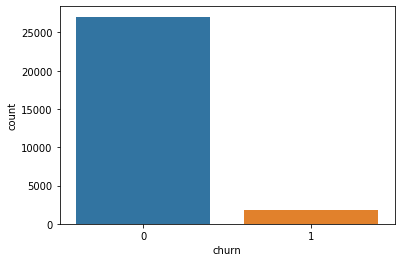

In [417]:
sns.countplot('churn',data=df_master_churn_data)

**Observation**: From the above graph, it looks like data is imbalanced

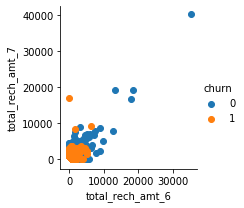

In [418]:
sns.FacetGrid(df_master_churn_data,hue='churn').map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

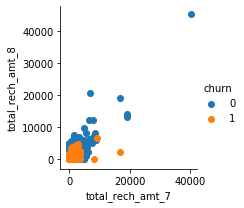

In [419]:
sns.FacetGrid(df_master_churn_data,hue='churn').map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

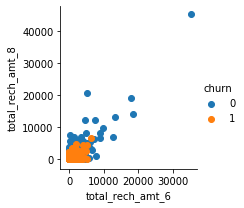

In [420]:
sns.FacetGrid(df_master_churn_data,hue='churn').map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

### univariate analysis

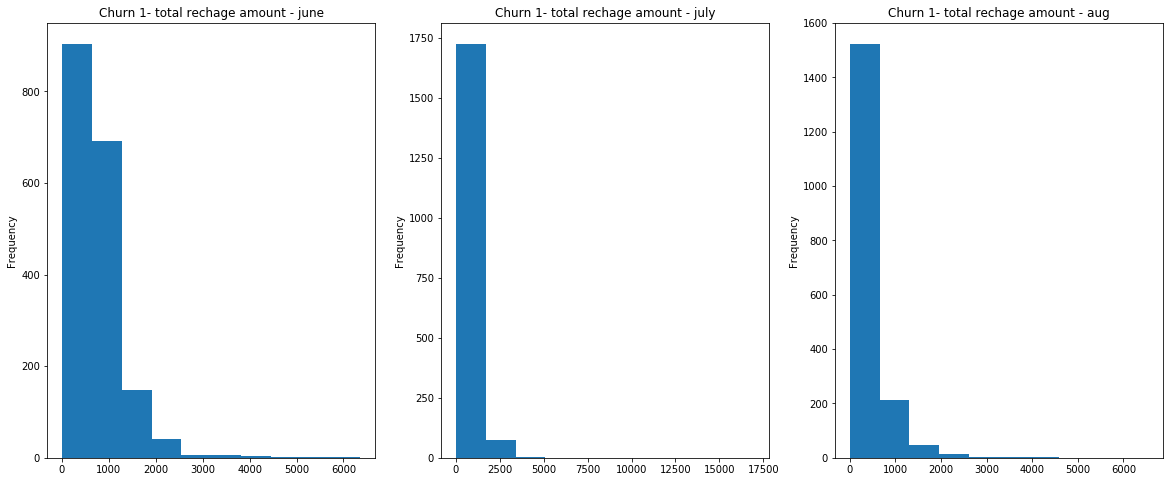

In [421]:
#univariate analysis on recharge amounts

churn_1_df = df_master_churn_data[df_master_churn_data['churn']==1]
churn_0_df = df_master_churn_data[df_master_churn_data['churn']==0]
plt.figure(figsize=(20,8))

plt.subplot(131)
churn_1_df.total_rech_amt_6.plot.hist(title="Churn 1- total rechage amount - june")

plt.subplot(132)
churn_1_df.total_rech_amt_7.plot.hist(title="Churn 1- total rechage amount - july")

plt.subplot(133)
churn_1_df.total_rech_amt_8.plot.hist(title="Churn 1- total rechage amount - aug")


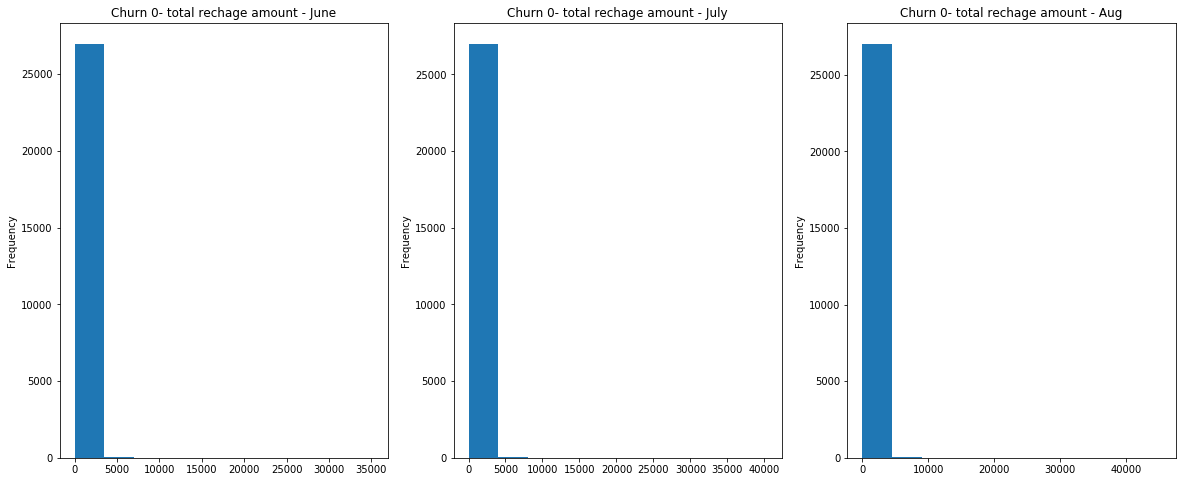

In [422]:
plt.figure(figsize=(20,8))

plt.subplot(131)
churn_0_df.total_rech_amt_6.plot.hist(title="Churn 0- total rechage amount - June")

plt.subplot(132)
churn_0_df.total_rech_amt_7.plot.hist(title="Churn 0- total rechage amount - July")

plt.subplot(133)
churn_0_df.total_rech_amt_8.plot.hist(title="Churn 0- total rechage amount - Aug")

**Observation**: from above graphs, we don't see any proper relationship among other features

## Features reduction with RFE and logistic regression

In [423]:
df_master_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28861 entries, 7 to 99997
Columns: 132 entries, mobile_number to churn
dtypes: float64(105), int64(27)
memory usage: 30.5 MB


In [424]:
#dropping mobile number from the dataframe 
df_master = df_master_churn_data.drop(['mobile_number'], axis=1)

#separate X and y
df_X = df_master.drop(['churn'],axis=1) # all predictor variables
df_y = df_master['churn'] # output variable

In [425]:
#data normalization using standard scalar
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc = preprocessing.StandardScaler().fit(df_X)
df_X = sc.transform(df_X)

In [426]:
#Split into train and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3,train_size=0.7,random_state=1)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (20202, 130)
y_train: (20202,)
X_test: (8659, 130)
y_test: (8659,)


In [427]:
churn_1=(y_train==1).sum()
churn_0=(y_train==0).sum()
tot=len(y_train)

print((churn_1/tot)*100 )
print((churn_0/tot)*100)

6.301356301356302
93.6986436986437


**Observations**
Percentage of churn: 6.301356301356302
Percentage of not churn: 93.6986436986437


from above, it is saying that data is imbalanced. So Lets do over_sampling using SMOTE(Synthetic Minority Oversampling Technique)
###### need to install imblearn if not installed. pip install imblearn

In [428]:
from imblearn.over_sampling import SMOTE

os= SMOTE(random_state=0)
os_X_train,os_y_train = os.fit_sample(X_train,y_train)

In [429]:
print(((os_y_train==1).sum()/len(os_y_train))*100 )
print(((os_y_train==0).sum()/len(os_y_train))*100)

50.0
50.0


**Observations**: Percentage of churn after over sampling: **50** and 
Percentage of not churn after over sampling: **50**

In [430]:
#features reduction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')

In [431]:
#Lets do RFE with 20 components
rfe= RFE(lr,20)
rfe = rfe.fit(os_X_train,os_y_train)

#### it is taking lot of time to process it.

In [432]:
# lets drop churn attribute
df_master = df_master.drop(['churn'], axis=1)

In [433]:
rfe_features = list(df_master.columns[rfe.support_])
rfe_features

['arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'monthly_3g_8']

**Observation**: above features were selected by RFE to build the model

In [434]:
#select the columns which are identified by RFE for LR model building
rfe_os_X_train = pd.DataFrame(data= os_X_train).iloc[:,rfe.support_]
rfe_os_y_train = os_y_train

In [435]:
#Lets create Logistic Regression model
lr_model = LogisticRegression(random_state=1)
lr_model.fit(rfe_os_X_train,rfe_os_y_train)

/Users/kotasai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [436]:
# Lets predict using Logistic Regression model
X_test_rfe = pd.DataFrame(data= X_test).iloc[:,rfe.support_]
y_pred = lr_model.predict(X_test_rfe)

In [437]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8125
           1       0.20      0.81      0.32       534

    accuracy                           0.79      8659
   macro avg       0.59      0.79      0.59      8659
weighted avg       0.94      0.79      0.84      8659



In [438]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test,y_pred)
print("Error Matrix:\n",con_matrix)

Error Matrix:
 [[6369 1756]
 [ 104  430]]


In [439]:
print('Accuracy:',lr_model.score(X_test_rfe,y_test)*100,"%")

Accuracy: 78.51945952188476 %


#### RFE and LR Summary:
1. Features selected by RFE for model building **['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8']**

2. We observed that accuracy was **78%**

### Reduce the number of variables using PCA

In [440]:
#drop mobile number from the dataframe 
df_master_churn_data = df_master_churn_data.drop(['mobile_number'], axis=1)
df_master = df_master_churn_data.drop(['churn'],axis=1)
df_X = df_master_churn_data.drop(['churn'],axis=1) # all predictor variables
df_y = df_master_churn_data['churn'] # output variable

In [441]:
# Lets normalize the data using standard scalar
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc = preprocessing.StandardScaler().fit(df_X)
df_X = sc.transform(df_X)

In [442]:
#Split into train and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, train_size=0.7, random_state=42)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',X_test.shape)

X_train: (20202, 130)
X_test: (8659, 130)
y_train: (20202,)
y_test: (8659, 130)


In [443]:
from imblearn.over_sampling import SMOTE
os= SMOTE(random_state=0)
os_X_train,os_y_train=os.fit_sample(X_train,y_train)

In [444]:
print(((os_y_train==1).sum()/len(os_y_train))*100 )
print(((os_y_train==0).sum()/len(os_y_train))*100)

50.0
50.0


**Observations**

churn: 6.301356301356302 %  

not churn: 93.6986436986437 %

In [445]:
#features reduction using PCA
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized',random_state=42)

In [446]:
#PCA with default parameters
pca.fit(os_X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [447]:
pca.components_

array([[ 1.70478946e-01,  1.81663728e-01,  1.31160441e-01, ...,
        -2.06914868e-02, -2.57355612e-02, -2.59657558e-02],
       [ 7.55852116e-02,  1.05471019e-01,  1.41030537e-01, ...,
         7.47841571e-02,  7.89064355e-02,  7.13461034e-02],
       [-4.42157563e-04, -1.86114350e-02, -3.45684398e-02, ...,
        -2.98253387e-02, -3.08380798e-02, -2.74085926e-02],
       ...,
       [-0.00000000e+00,  2.75580066e-15,  1.49871657e-15, ...,
         1.36075705e-15, -6.56834689e-16,  4.53777937e-17],
       [-2.58491784e-16, -6.78722224e-17,  2.11115939e-16, ...,
        -1.05186391e-16,  7.69724966e-18,  3.20647091e-17],
       [ 0.00000000e+00,  4.22545525e-17,  1.40736385e-16, ...,
         1.71175332e-16, -1.23471031e-16, -2.11451922e-16]])

In [448]:
col_names = list(df_master.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col_names})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.170479,0.075585,-0.000442,arpu_6
1,0.181664,0.105471,-0.018611,arpu_7
2,0.131160,0.141031,-0.034568,arpu_8
3,0.200683,-0.084050,-0.008784,onnet_mou_6
4,0.204921,-0.061949,-0.019375,onnet_mou_7
5,0.149772,-0.003726,-0.032591,onnet_mou_8
6,0.178262,0.011019,0.003500,offnet_mou_6
7,0.193726,0.027474,-0.010261,offnet_mou_7
8,0.126760,0.075309,-0.034256,offnet_mou_8
9,-0.012248,0.011022,0.059472,roam_ic_mou_6


In [449]:
tot = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
tot[:]

array([ 9.67, 18.62, 25.74, 31.5 , 36.16, 40.66, 44.63, 48.14, 51.08,
       53.74, 55.92, 57.9 , 59.79, 61.53, 63.1 , 64.56, 65.99, 67.35,
       68.69, 70.  , 71.24, 72.44, 73.62, 74.7 , 75.73, 76.71, 77.62,
       78.44, 79.22, 79.97, 80.7 , 81.41, 82.11, 82.79, 83.44, 84.08,
       84.71, 85.33, 85.89, 86.44, 86.98, 87.51, 88.03, 88.52, 88.99,
       89.43, 89.85, 90.26, 90.66, 91.05, 91.43, 91.8 , 92.12, 92.44,
       92.75, 93.05, 93.35, 93.63, 93.9 , 94.16, 94.41, 94.66, 94.9 ,
       95.13, 95.35, 95.56, 95.77, 95.97, 96.17, 96.36, 96.54, 96.72,
       96.89, 97.06, 97.22, 97.38, 97.54, 97.69, 97.84, 97.98, 98.12,
       98.26, 98.39, 98.52, 98.64, 98.76, 98.88, 98.99, 99.1 , 99.21,
       99.31, 99.4 , 99.48, 99.55, 99.62, 99.68, 99.74, 99.79, 99.83,
       99.86, 99.89, 99.91, 99.93, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94,

In [450]:
tot[:50]

array([ 9.67, 18.62, 25.74, 31.5 , 36.16, 40.66, 44.63, 48.14, 51.08,
       53.74, 55.92, 57.9 , 59.79, 61.53, 63.1 , 64.56, 65.99, 67.35,
       68.69, 70.  , 71.24, 72.44, 73.62, 74.7 , 75.73, 76.71, 77.62,
       78.44, 79.22, 79.97, 80.7 , 81.41, 82.11, 82.79, 83.44, 84.08,
       84.71, 85.33, 85.89, 86.44, 86.98, 87.51, 88.03, 88.52, 88.99,
       89.43, 89.85, 90.26, 90.66, 91.05])

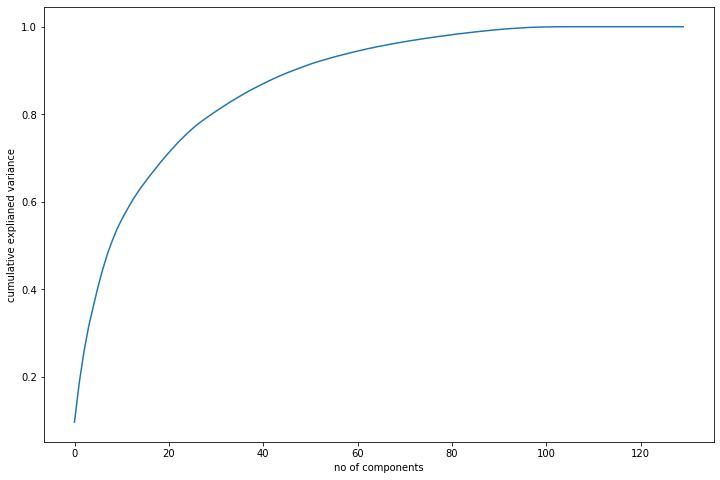

In [451]:
#Lets do plotting the cumulative variance vs number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('cumulative explianed variance')
plt.xlabel('no of components')
plt.show()

#### Looks like 49 components are enough to get 91% of the variance
- We'll choose 49 components for our modeling

In [452]:
#Lets do incremental PCA for efficiency. as we have large data

#Ref: https://stackoverflow.com/questions/31428581/incremental-pca-on-big-data

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=49)

In [453]:
df_X_train_pca = pca_final.fit_transform(os_X_train)
df_X_test_pca = pca_final.transform(X_test)

In [454]:
print(df_X_train_pca.shape)
print(df_X_test_pca.shape)

(37904, 49)
(8659, 49)


#### Lets apply  logistic regression on principal components

In [455]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_X_train_pca,os_y_train)

y_pred = model_pca.predict(df_X_test_pca)

In [456]:
print(accuracy_score(y_test,y_pred))

0.7989375216537706


**Observations**: LogisticRegression accuracy with PCA: **79%**

*AUC provides an aggregate measure of performance across all possible classification thresholds.*

In [457]:
#Lets do predictions on the test data
pred_probs_test = model_pca.predict_proba(df_X_test_pca)[:,1]
print(metrics.roc_auc_score(y_test, pred_probs_test))

0.862479818578829


**Observations**: AUC score with PCA: **86%**

In [458]:
con_2= confusion_matrix(y_test,y_pred)
print(con_2)

[[6480 1622]
 [ 119  438]]


### with PCA
1. Used SMOTE over sampling for data, As data imabalced with 6.1% churn data, 
2. 91% variance can be explained with 49 columns with a accuracy of 79.89%.
5. Key features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

## features reduction using Random Forest

In [459]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)

In [460]:
#PCA withe default parameters
model.fit(os_X_train,os_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [461]:
model.feature_importances_

array([1.64806414e-03, 2.91212559e-03, 2.19146839e-02, 2.34371333e-03,
       2.71128824e-03, 4.18759312e-03, 1.70246391e-03, 2.19072788e-03,
       3.19580441e-03, 1.73391527e-03, 1.18305489e-02, 1.00857143e-01,
       1.76957750e-03, 5.31851330e-03, 1.53249387e-01, 2.64867445e-03,
       2.60869359e-03, 7.75724266e-03, 2.68017554e-03, 4.68872548e-03,
       3.35635313e-02, 1.24805810e-03, 1.28578099e-03, 5.87039237e-03,
       9.21873321e-04, 3.80244708e-03, 8.84308869e-04, 1.86974774e-03,
       7.50102292e-03, 1.99929084e-02, 7.14661969e-03, 5.59398287e-03,
       3.03229925e-03, 3.39987714e-03, 3.45063999e-03, 1.74504167e-03,
       9.83603544e-04, 6.88923425e-04, 6.54248473e-04, 3.16573127e-03,
       3.42926395e-03, 4.68577529e-03, 1.61825586e-03, 1.79434507e-03,
       1.81649014e-03, 4.62635792e-03, 8.81973265e-03, 2.65524377e-03,
       2.49635643e-03, 7.94772419e-05, 1.03602327e-04, 2.05939616e-03,
       2.94405069e-03, 2.33552744e-02, 2.24247346e-03, 2.71635777e-03,
      

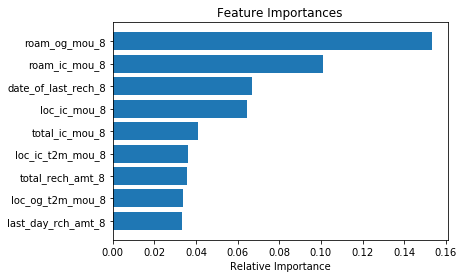

In [462]:
# Lets graph with top 10 features
features = df_master.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

*Lets create the selector object that will help us in the random forest classifier to identify features that have an importance of more than 0.15*

reference : https://stackoverflow.com/questions/49345578/how-to-decide-threshold-value-in-selectfrommodel-for-selecting-features

In [463]:
from sklearn.feature_selection import SelectFromModel
# Lets do hyper tuning thresold value with 0.15
sel_rf_model = SelectFromModel(model, threshold=0.15)
sel_rf_model.fit(os_X_train,os_y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 r

In [464]:
# selected features
selected_features= df_master.columns[(sel_rf_model.get_support())]
selected_features

Index(['roam_og_mou_8'], dtype='object')

In [465]:
# Lets do hyper tuning thresold value with 0.05
sel_rf_model_2 = SelectFromModel(model, threshold=0.05)
sel_rf_model_2.fit(os_X_train,os_y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 r

In [466]:
selected_features_2= df_master.columns[(sel_rf_model_2.get_support())]
selected_features_2

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_ic_mou_8',
       'date_of_last_rech_8'],
      dtype='object')

In [467]:
# hyper tuning thresold value 0.025
sel_rf_model_3 = SelectFromModel(model, threshold=0.025)
sel_rf_model_3.fit(os_X_train,os_y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 r

In [468]:
# features selected are 
selected_features_3= df_master.columns[(sel_rf_model_3.get_support())]
selected_features_3

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8'],
      dtype='object')

#### going with a thresold of 0.025. model 3 as it satisfies our requirements

Lets Transform the data to create a new dataset containing with important features

In [469]:
X_imprtnt_train=sel_rf_model_3.transform(os_X_train)
X_imprtnt_test=sel_rf_model_3.transform(X_test)

#### Train A New Random Forest Classifier Using Only Most Important Features

In [470]:
# Create a new random forest classifier for the important features dataset
clsf_important=RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [471]:
# Lets train the new classifier on the important features dataset
clsf_important.fit(X_imprtnt_train, os_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [472]:
# Predicted probabilities
y_pred=model.predict(X_test)
# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9183508488278093

In [473]:
# Apply The Full Featured Classifier To The Test Data
y_imprtnt_pred=clf_important.predict(X_imprtnt_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_imprtnt_pred)

0.914077838087539

In [474]:
#Lets use incremental PCA for efficiency on big data set
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=49)

In [475]:
df_X_train_pca = pca_final.fit_transform(os_X_train)
df_X_test_pca = pca_final.transform(X_test)

In [476]:
print(df_X_train_pca.shape)
print(df_X_test_pca.shape)

(37904, 49)
(8659, 49)


In [477]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [478]:
rfc.fit(df_X_train_pca,os_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [479]:
predictions = rfc.predict(df_X_test_pca)

In [483]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8102
           1       0.35      0.41      0.38       557

    accuracy                           0.91      8659
   macro avg       0.65      0.68      0.66      8659
weighted avg       0.92      0.91      0.92      8659



In [484]:
# confusion or Error matrix
con_3=confusion_matrix(y_test,predictions)
print(con_3)

[[7672  430]
 [ 328  229]]


In [485]:
print(accuracy_score(y_test,predictions))

0.9124610232128422


**Observations**: Random forest model results in a **91%** accurate model


####  A. RFE and LR Summary:
1. Features selected by RFE for model building **['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8']**

2. We observed that accuracy was **78%**

#### B. with PCA
1. Used SMOTE over sampling for data, As data imabalced with 6.1% churn data, 
2. 91% variance can be explained with 49 columns with a accuracy of 79.89%.
5. Key features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

#### C. Random forest model results in a 91% accurate model

# Over all summary


Both random forest classifier with all features and selected features results in the same accuracy with **91%**.

Random forest classifier with selected features by PCA results in the same accuraccy with **91%**